# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
import scipy.stats as st

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url ="http://api.openweathermap.org/data/2.5/weather?"

In [5]:
print(requests.get(url))

<Response [401]>


In [6]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"
#how the it should be formatted
#http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={API key}
query_url=f"{url}appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city
    response=requests.get(city_url).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp =response['main']['temp_max']
        city_humidity =response['main']['humidity']
        city_clouds =response['wind']['speed']
        city_wind =response['wind']['speed']
        city_country =response['sys']['country']
        city_date =response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nogliki
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | laojunmiao
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | arta
Processing Record 7 of Set 1 | banda aceh
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | ketchikan
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | kismayo
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | la'ie
Processing Record 21 of Set 1 | devinuwara
City not found. Skipping...
Processing R

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nogliki,51.8333,143.1667,-5.82,93,3.66,3.66,RU,1740527387
1,puerto natales,-51.7236,-72.4875,6.23,67,5.61,5.61,CL,1740527388
2,margaret river,-33.9500,115.0667,16.90,77,3.05,3.05,AU,1740527389
3,laojunmiao,39.8333,97.7333,-1.47,15,3.41,3.41,CN,1740527390
4,vorgashor,67.5833,63.9500,-2.77,97,4.06,4.06,RU,1740527391


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nogliki,51.8333,143.1667,-5.82,93,3.66,3.66,RU,1740527387
1,puerto natales,-51.7236,-72.4875,6.23,67,5.61,5.61,CL,1740527388
2,margaret river,-33.9500,115.0667,16.90,77,3.05,3.05,AU,1740527389
3,laojunmiao,39.8333,97.7333,-1.47,15,3.41,3.41,CN,1740527390
4,vorgashor,67.5833,63.9500,-2.77,97,4.06,4.06,RU,1740527391


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

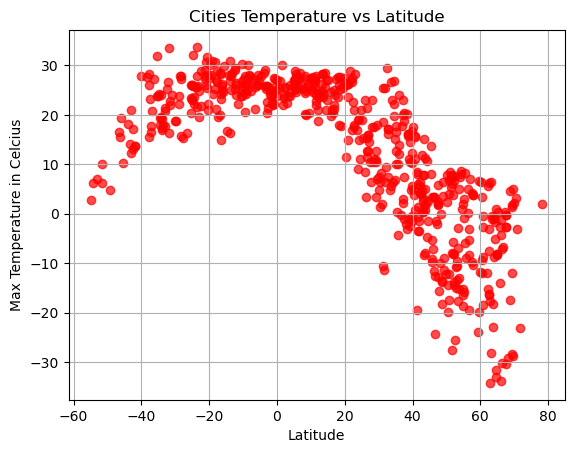

In [11]:
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],color='red',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celcius")
plt.title("Cities Temperature vs Latitude")
plt.grid(True)
plt.show()

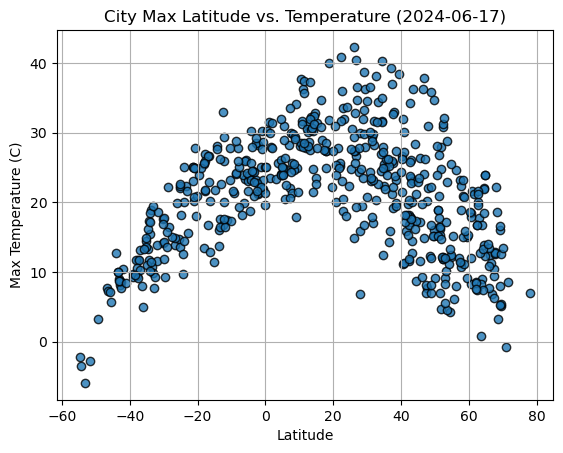

In [ ]:
# Build scatter plot for latitude vs. temperature


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

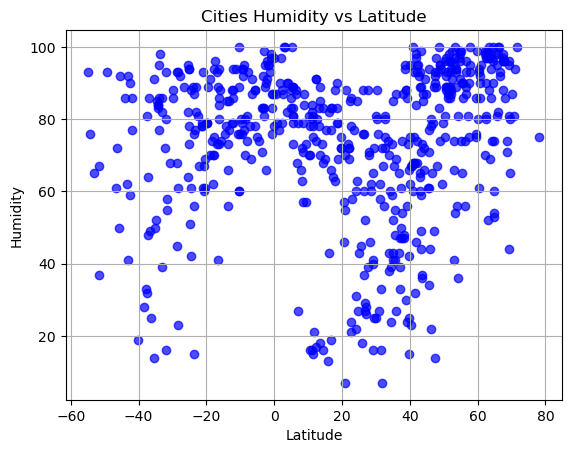

In [12]:
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],color='blue',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Cities Humidity vs Latitude")
plt.grid(True)
plt.show()

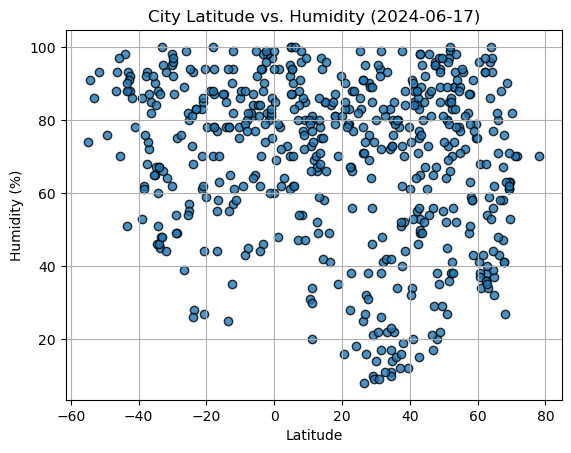

In [ ]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

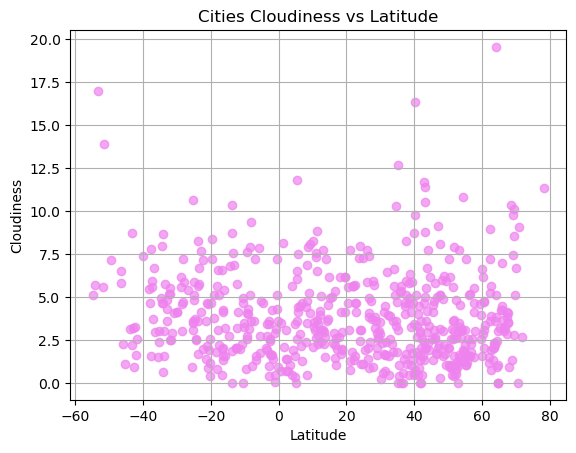

In [13]:
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],color='violet',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cities Cloudiness vs Latitude")
plt.grid(True)
plt.show()

#### Latitude Vs. Cloudiness

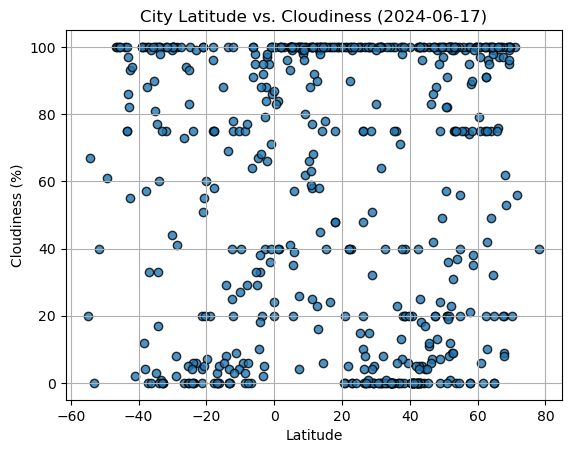

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

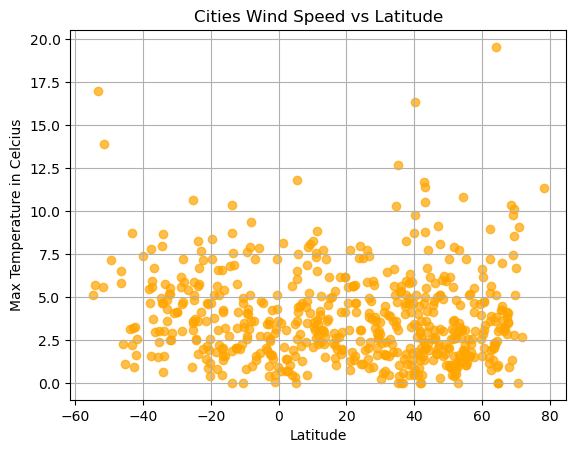

In [14]:
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],color='orange',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celcius")
plt.title("Cities Wind Speed vs Latitude")
plt.grid(True)
plt.show()

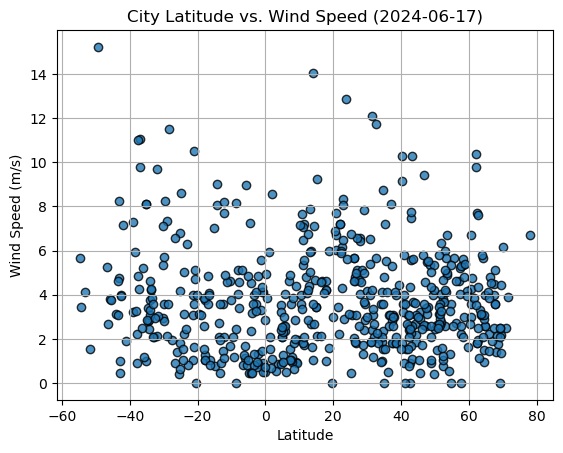

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [128]:
# Define a function to create Linear Regression plots
#plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],color='red',alpha=0.7)
#plt.xlabel("Latitude")
#plt.ylabel("Max Temperature in Celcius")
#plt.title("Cities Temperature vs Latitude")
#plt.grid(True)
#x_values=city_data_df['Lat']
#y_values=city_data_df['Max Temp']
#slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
#regress_values1=x_values*slope+intercept
#line_eq=f"y={slope:.2f}x+{intercept:.2f}"
#plt.plot(x_values,regress_values1,color='blue')
#plt.annotate(line_eq,(min(x_values)+1,max(y_values)-40),fontsize=12,color='blue')



In [15]:
northern_hem_df=city_data_df.loc[city_data_df['Lat']>=0]

In [16]:
northern_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nogliki,51.8333,143.1667,-5.82,93,3.66,3.66,RU,1740527387
3,laojunmiao,39.8333,97.7333,-1.47,15,3.41,3.41,CN,1740527390
4,vorgashor,67.5833,63.9500,-2.77,97,4.06,4.06,RU,1740527391
5,arta,39.1606,20.9853,10.39,86,1.02,1.02,GR,1740527393
6,banda aceh,5.5577,95.3222,25.28,89,6.50,6.50,ID,1740527394
...,...,...,...,...,...,...,...,...,...
581,horta,38.5333,-28.6333,15.80,95,5.81,5.81,PT,1740528266
582,bulayevo,54.9056,70.4439,-18.71,99,2.20,2.20,KZ,1740528268
584,klaksvik,62.2266,-6.5890,5.55,70,8.96,8.96,FO,1740528272


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [17]:
southern_hem_df=city_data_df.loc[city_data_df['Lat']<0]

In [18]:
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,6.23,67,5.61,5.61,CL,1740527388
2,margaret river,-33.9500,115.0667,16.90,77,3.05,3.05,AU,1740527389
7,adamstown,-25.0660,-130.1015,26.12,73,4.82,4.82,PN,1740527395
10,saint-pierre,-21.3393,55.4781,27.82,78,3.60,3.60,RE,1740527399
11,kismayo,-0.3582,42.5454,24.96,87,7.19,7.19,SO,1740527400


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

Text(-4.799999999999997, 58.75, 'y=-0.34x+18.84')

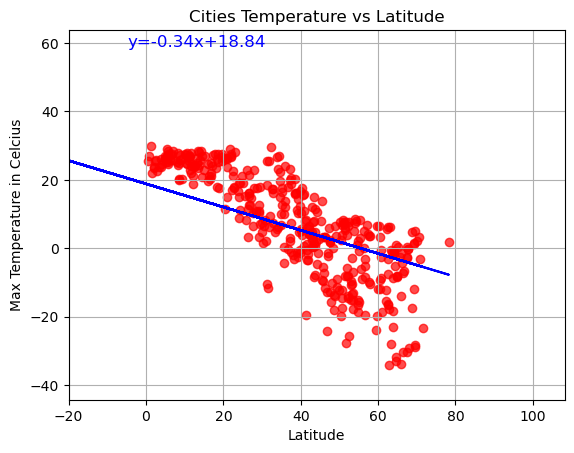

In [19]:
plt.scatter(northern_hem_df['Lat'],northern_hem_df['Max Temp'],color='red',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celcius")
plt.title("Cities Temperature vs Latitude")
plt.grid(True)
x_values=city_data_df['Lat']
y_values=city_data_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values1=x_values*slope+intercept
line_eq=f"y={slope:.2f}x+{intercept:.2f}"
plt.plot(x_values,regress_values1,color='blue')
plt.xlim(-20, max(x_values) + 30)
plt.ylim(min(y_values)-10, max(y_values) + 30)
plt.annotate(line_eq,(min(x_values)+50,max(y_values)+25),fontsize=12,color='blue')

In [20]:
correlation=st.pearsonr(northern_hem_df['Lat'],northern_hem_df["Max Temp"])

In [21]:
print(f"The correlation between both factorsis {round(correlation[0],2)}")

The correlation between both factorsis -0.82


The r^2-value is: 0.3940754297489331


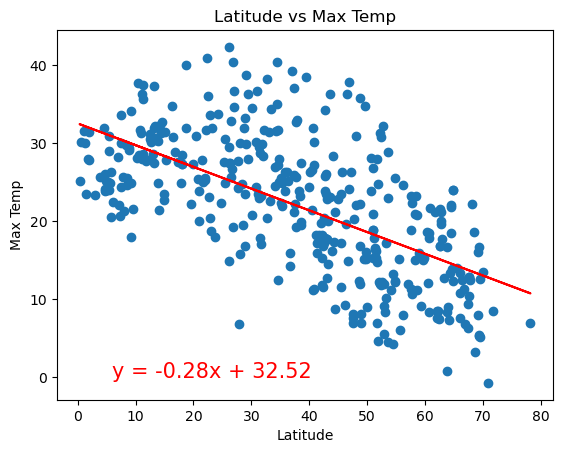

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

Text(-53.8, 28.75, 'y=0.23a+28.42')

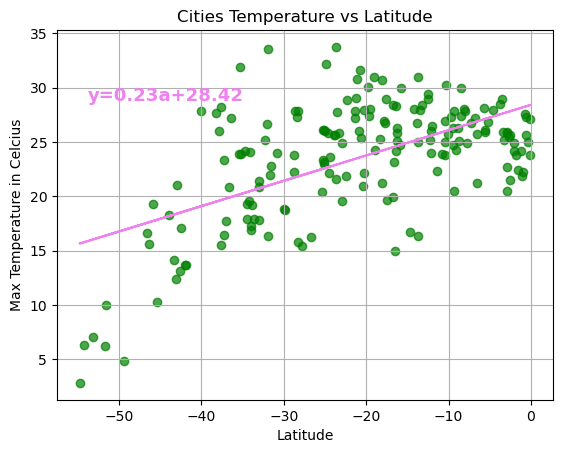

In [22]:
plt.scatter(southern_hem_df['Lat'],southern_hem_df['Max Temp'],color='green',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celcius")
plt.title("Cities Temperature vs Latitude")
plt.grid(True)
a_values=southern_hem_df['Lat']
b_values=southern_hem_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(a_values, b_values)
regress_values2=a_values*slope+intercept
line_eq2=f"y={slope:.2f}a+{intercept:.2f}"
plt.plot(a_values,regress_values2,color='violet')
plt.annotate(line_eq2,(min(a_values)+1,max(b_values)-5),fontsize=13,color='violet',fontweight='bold')

In [23]:
correlation=st.pearsonr(southern_hem_df['Lat'],southern_hem_df["Max Temp"])

In [24]:
print(f"The correlation between both factorsis {round(correlation[0],2)}")

The correlation between both factorsis 0.58


The r^2-value is: 0.6720220238897325


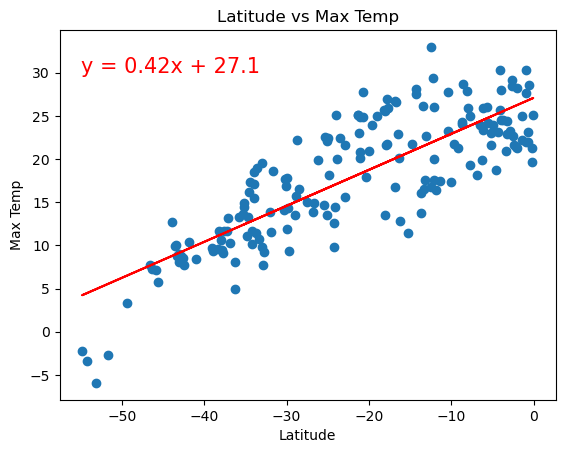

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Given that the r value is 0.67 we can state that there is a moderate correlation between Latitude and Max Temp. Most of the data points follow the linear equation that as the latitude gets closer to the equator (0 degrees) the Max Temperature starts to rise.

### Humidity vs. Latitude Linear Regression Plot

Text(50.5167, 125, 'y=0.40x+55.26')

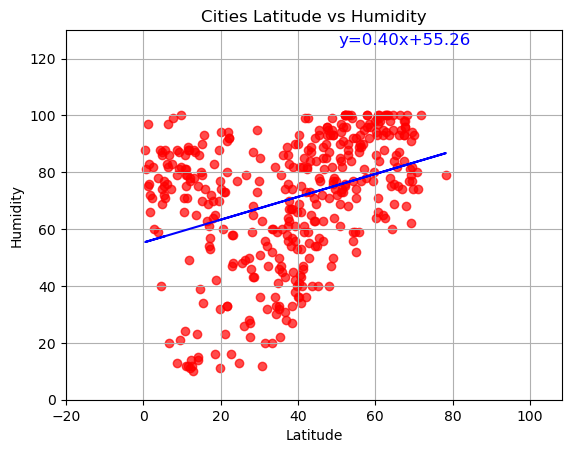

In [160]:
plt.scatter(northern_hem_df['Lat'],northern_hem_df['Humidity'],color='red',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Cities Latitude vs Humidity")
plt.grid(True)
x_values=northern_hem_df['Lat']
y_values=northern_hem_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values1=x_values*slope+intercept
line_eq=f"y={slope:.2f}x+{intercept:.2f}"
plt.plot(x_values,regress_values1,color='blue')
plt.xlim(-20, max(x_values) + 30)
plt.ylim(min(y_values)-10, max(y_values) + 30)
plt.annotate(line_eq,(min(x_values)+50,max(y_values)+25),fontsize=12,color='blue')

In [144]:
correlation=st.pearsonr(northern_hem_df['Lat'],northern_hem_df["Humidity"])

In [145]:
print(f"The correlation between both factorsis {round(correlation[0],2)}")

The correlation between both factorsis 0.34


The r^2-value is: 0.007659599322853922


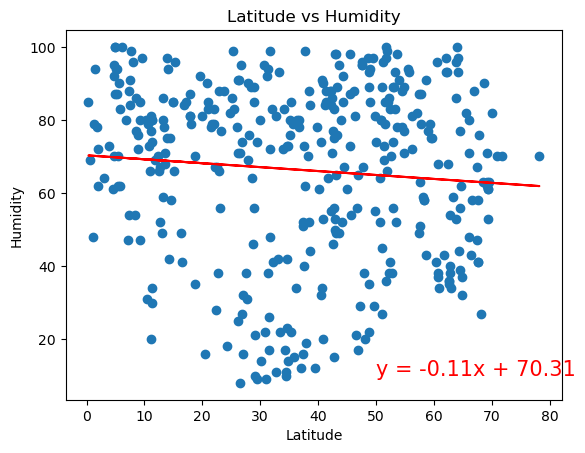

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

Text(-53.8, 25, 'y=0.21a+82.09')

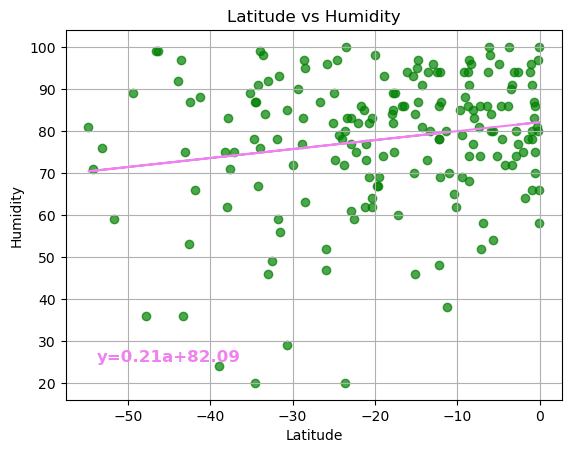

In [161]:
plt.scatter(southern_hem_df['Lat'],southern_hem_df['Humidity'],color='green',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.grid(True)
a_values=southern_hem_df['Lat']
b_values=southern_hem_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(a_values, b_values)
regress_values2=a_values*slope+intercept
line_eq2=f"y={slope:.2f}a+{intercept:.2f}"
plt.plot(a_values,regress_values2,color='violet')
plt.annotate(line_eq2,(min(a_values)+1,max(b_values)-75),fontsize=12,color='violet',fontweight='bold')

In [146]:
correlation=st.pearsonr(southern_hem_df['Lat'],southern_hem_df["Humidity"])

In [147]:
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factorsis 0.18


The r^2-value is: 0.00014367159540169783


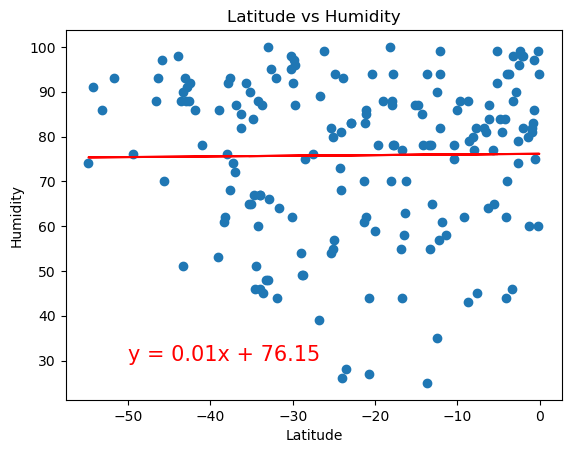

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Given that the correlation between latitude and humidity is r=0.18 we can say that there is none or a weak correlation between the two. This can been seen clearly because data close to the euqator have a high concentration of humidity. However some data sets farthest from the equator have also a high concentration of humidity. We can determine that the levels of huminidy might be affected by other factos and not just the latitude or location along the equator.

### Cloudiness vs. Latitude Linear Regression Plot

Text(50.5167, 39.92, 'y=0.01x+3.51')

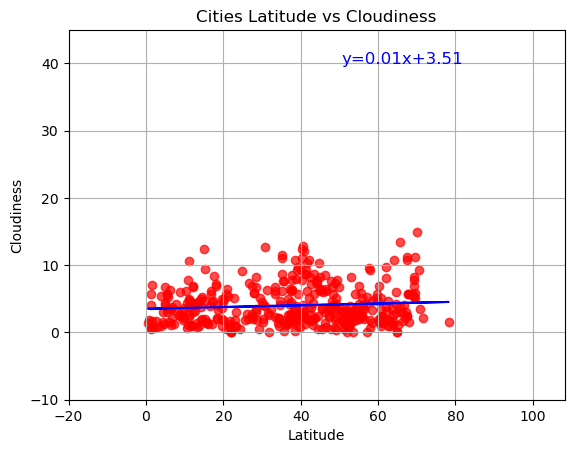

In [162]:
plt.scatter(northern_hem_df['Lat'],northern_hem_df['Cloudiness'],color='red',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cities Latitude vs Cloudiness")
plt.grid(True)
x_values=northern_hem_df['Lat']
y_values=northern_hem_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values1=x_values*slope+intercept
line_eq=f"y={slope:.2f}x+{intercept:.2f}"
plt.plot(x_values,regress_values1,color='blue')
plt.xlim(-20, max(x_values) + 30)
plt.ylim(min(y_values)-10, max(y_values) + 30)
plt.annotate(line_eq,(min(x_values)+50,max(y_values)+25),fontsize=12,color='blue')

In [148]:
correlation=st.pearsonr(northern_hem_df['Lat'],northern_hem_df["Cloudiness"])

In [149]:
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.09


The r^2-value is: 0.006456908379763574


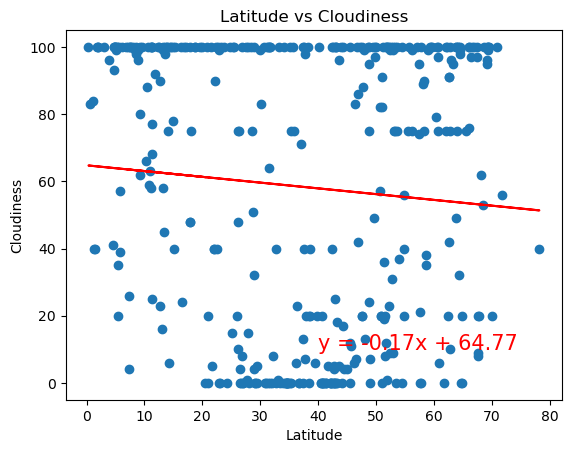

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

Text(-44.8, 15.8, 'y=-0.05a+2.78')

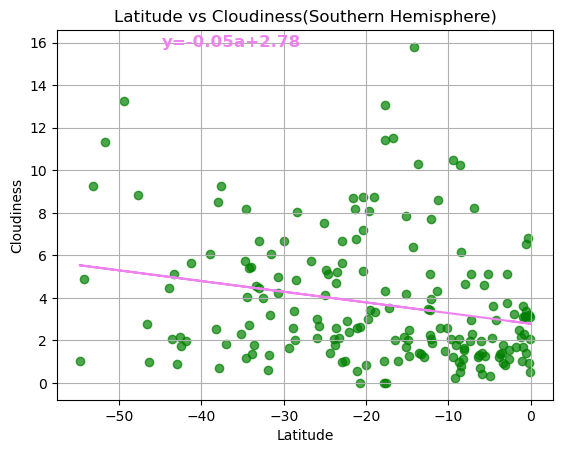

In [163]:
plt.scatter(southern_hem_df['Lat'],southern_hem_df['Cloudiness'],color='green',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness(Southern Hemisphere)")
plt.grid(True)
a_values=southern_hem_df['Lat']
b_values=southern_hem_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(a_values, b_values)
regress_values2=a_values*slope+intercept
line_eq2=f"y={slope:.2f}a+{intercept:.2f}"
plt.plot(a_values,regress_values2,color='violet')
plt.annotate(line_eq2,(min(a_values)+10,max(b_values)),fontsize=12,color='violet',fontweight='bold')

In [150]:
correlation=st.pearsonr(southern_hem_df['Lat'],southern_hem_df["Cloudiness"])

In [151]:
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.23


The r^2-value is: 0.018616831531634456


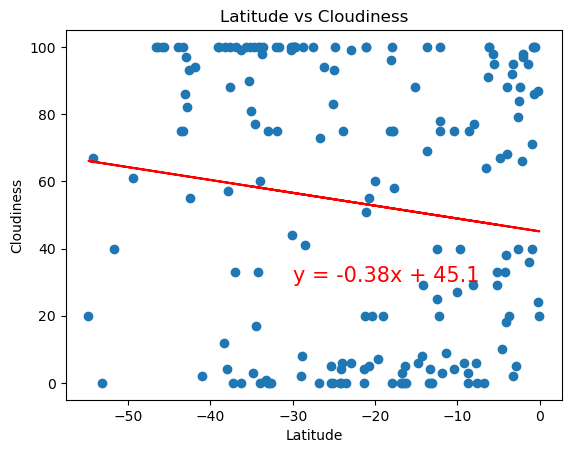

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Given that the correlation between the cloudiness and latitude is r=0.23 it is consider very weak or none existing. We can conclude that levels of cloudiness are affected by other factos and latitude has very little effect on the level of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

Text(50.5167, 39.92, 'y=0.01x+3.51')

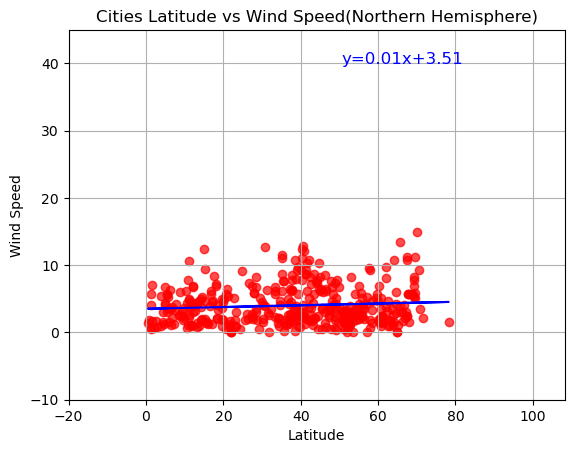

In [164]:
plt.scatter(northern_hem_df['Lat'],northern_hem_df['Wind Speed'],color='red',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Cities Latitude vs Wind Speed(Northern Hemisphere)")
plt.grid(True)
x_values=northern_hem_df['Lat']
y_values=northern_hem_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values1=x_values*slope+intercept
line_eq=f"y={slope:.2f}x+{intercept:.2f}"
plt.plot(x_values,regress_values1,color='blue')
plt.xlim(-20, max(x_values) + 30)
plt.ylim(min(y_values)-10, max(y_values) + 30)
plt.annotate(line_eq,(min(x_values)+50,max(y_values)+25),fontsize=12,color='blue')

In [152]:
correlation=st.pearsonr(northern_hem_df['Lat'],northern_hem_df["Wind Speed"])

In [153]:
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.09


The r^2-value is: 0.0017236249523139959


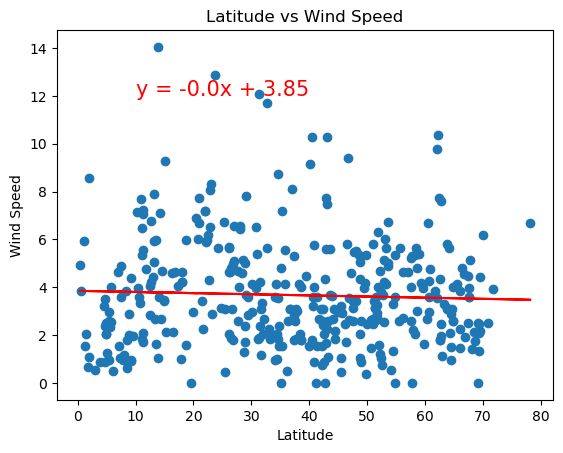

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

Text(-44.8, 15.8, 'y=-0.05a+2.78')

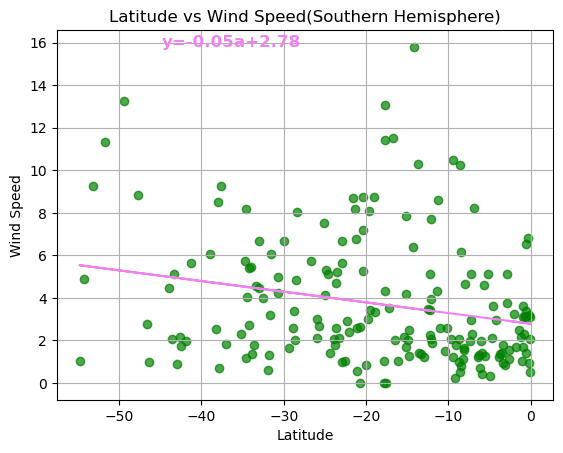

In [165]:
plt.scatter(southern_hem_df['Lat'],southern_hem_df['Wind Speed'],color='green',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed(Southern Hemisphere)")
plt.grid(True)
a_values=southern_hem_df['Lat']
b_values=southern_hem_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(a_values, b_values)
regress_values2=a_values*slope+intercept
line_eq2=f"y={slope:.2f}a+{intercept:.2f}"
plt.plot(a_values,regress_values2,color='violet')
plt.annotate(line_eq2,(min(a_values)+10,max(b_values)),fontsize=12,color='violet',fontweight='bold')

In [154]:
correlation=st.pearsonr(southern_hem_df['Lat'],southern_hem_df["Wind Speed"])

In [155]:
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.23


The r^2-value is: 0.06495869418886388


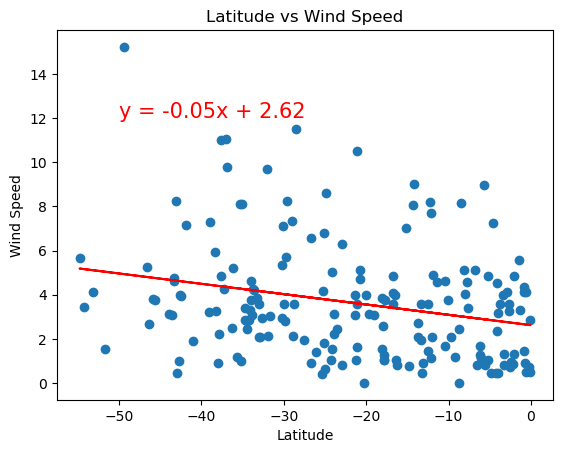

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Given thet the correlation between Wind speed and Latitude is r=0.23 it is considered weak or none existing. Examining the data set when the latitude is zero in some cities the wind speed is low. The same is true on the opposite side when cities are farther away from the equator the wind speed remains unchanged.